In [1]:
#Notebook outline:
#EDA involving Data cleaning 
#Models fitting, prediction, and recommendation 
#Conclusion

In [2]:
#This section imports necessary Python libraries for data manipulation, visualization, and machine learning.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To read the training and testing datasets for the HR analytics project from CSV files
data = pd.read_csv('D:/MBA ITBM2023-25/Sem 2/BA/Assignment/Final/aug_train.csv')
test = pd.read_csv('D:/MBA ITBM2023-25/Sem 2/BA/Assignment/Final/aug_test.csv')

In [4]:
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Exploratory Data Analysis Steps

#Step 1- Knowing the Attributes

In [5]:
data.dtypes #To check the data type.

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

#Step 2- Finding Missing Values

In [6]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
# enrollee_id: No missing values (count is 0).
#city: No missing values (count is 0).
#city_development_index: No missing values (count is 0).
#gender: 4508 missing values.
#relevent_experience: No missing values (count is 0).
#enrolled_university: 386 missing values.
#education_level: 460 missing values.
#major_discipline: 2813 missing values.
#experience: 65 missing values.
#company_size: 5938 missing values.
#company_type: 6140 missing values.
#last_new_job: 423 missing values.
#training_hours: No missing values (count is 0).
#target: No missing values (count is 0).
#This information is useful for understanding the data quality and deciding how to handle missing values in each column. 
#Depending on our analysis or modeling goals, we may need to impute or remove the missing values in columns listed above.

#Step 3- Outlier Analyis using boxplots

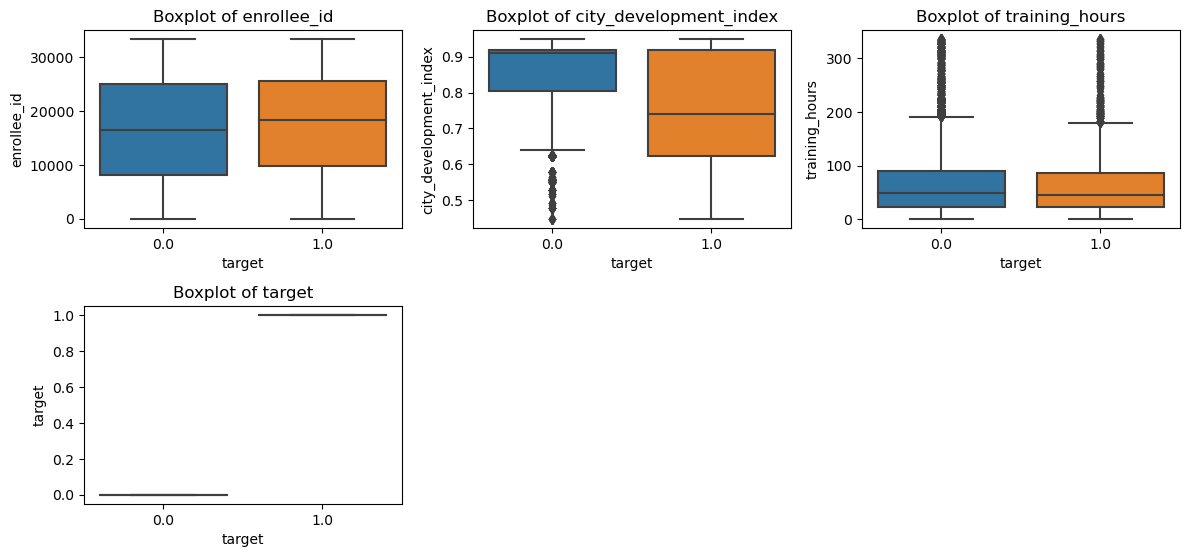

In [9]:
# Assuming your dataset is named df_train
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='target', y=col, data=data)

    # Set plot title
    plt.title(f'Boxplot of {col}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#Step 4- Understanding the correlation matrix for numerical data/features

In [9]:
data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [10]:
#The correlation matrix above shows the correlation coefficients between pairs of variables.
#The interpretation of the provided correlations:
#enrollee_id vs. city_development_index: There is a weak negative correlation (-0.040455), indicating a slight tendency that as one variable increases, the other decreases.
#enrollee_id vs. training_hours: There is almost no correlation (0.000998), suggesting a very weak relationship between enrollee_id and training_hours.
#enrollee_id vs. target: There is a weak positive correlation (0.049475), indicating a slight tendency that as enrollee_id increases, the target variable also increases.
#city_development_index vs. training_hours: There is almost no correlation (0.001920), suggesting a very weak relationship between city_development_index and training_hours.
#city_development_index vs. target: There is a moderate negative correlation (-0.341665), indicating that as city_development_index decreases, the target variable tends to increase.
#training_hours vs. target: There is a weak negative correlation (-0.021577), suggesting a slight tendency that as training_hours decrease, the target variable might slightly increase.
#These correlation values help us understand the linear relationship between pairs of variables. Other factors may influence the observed relationships.

#Step 5- Visualizing Categorical features

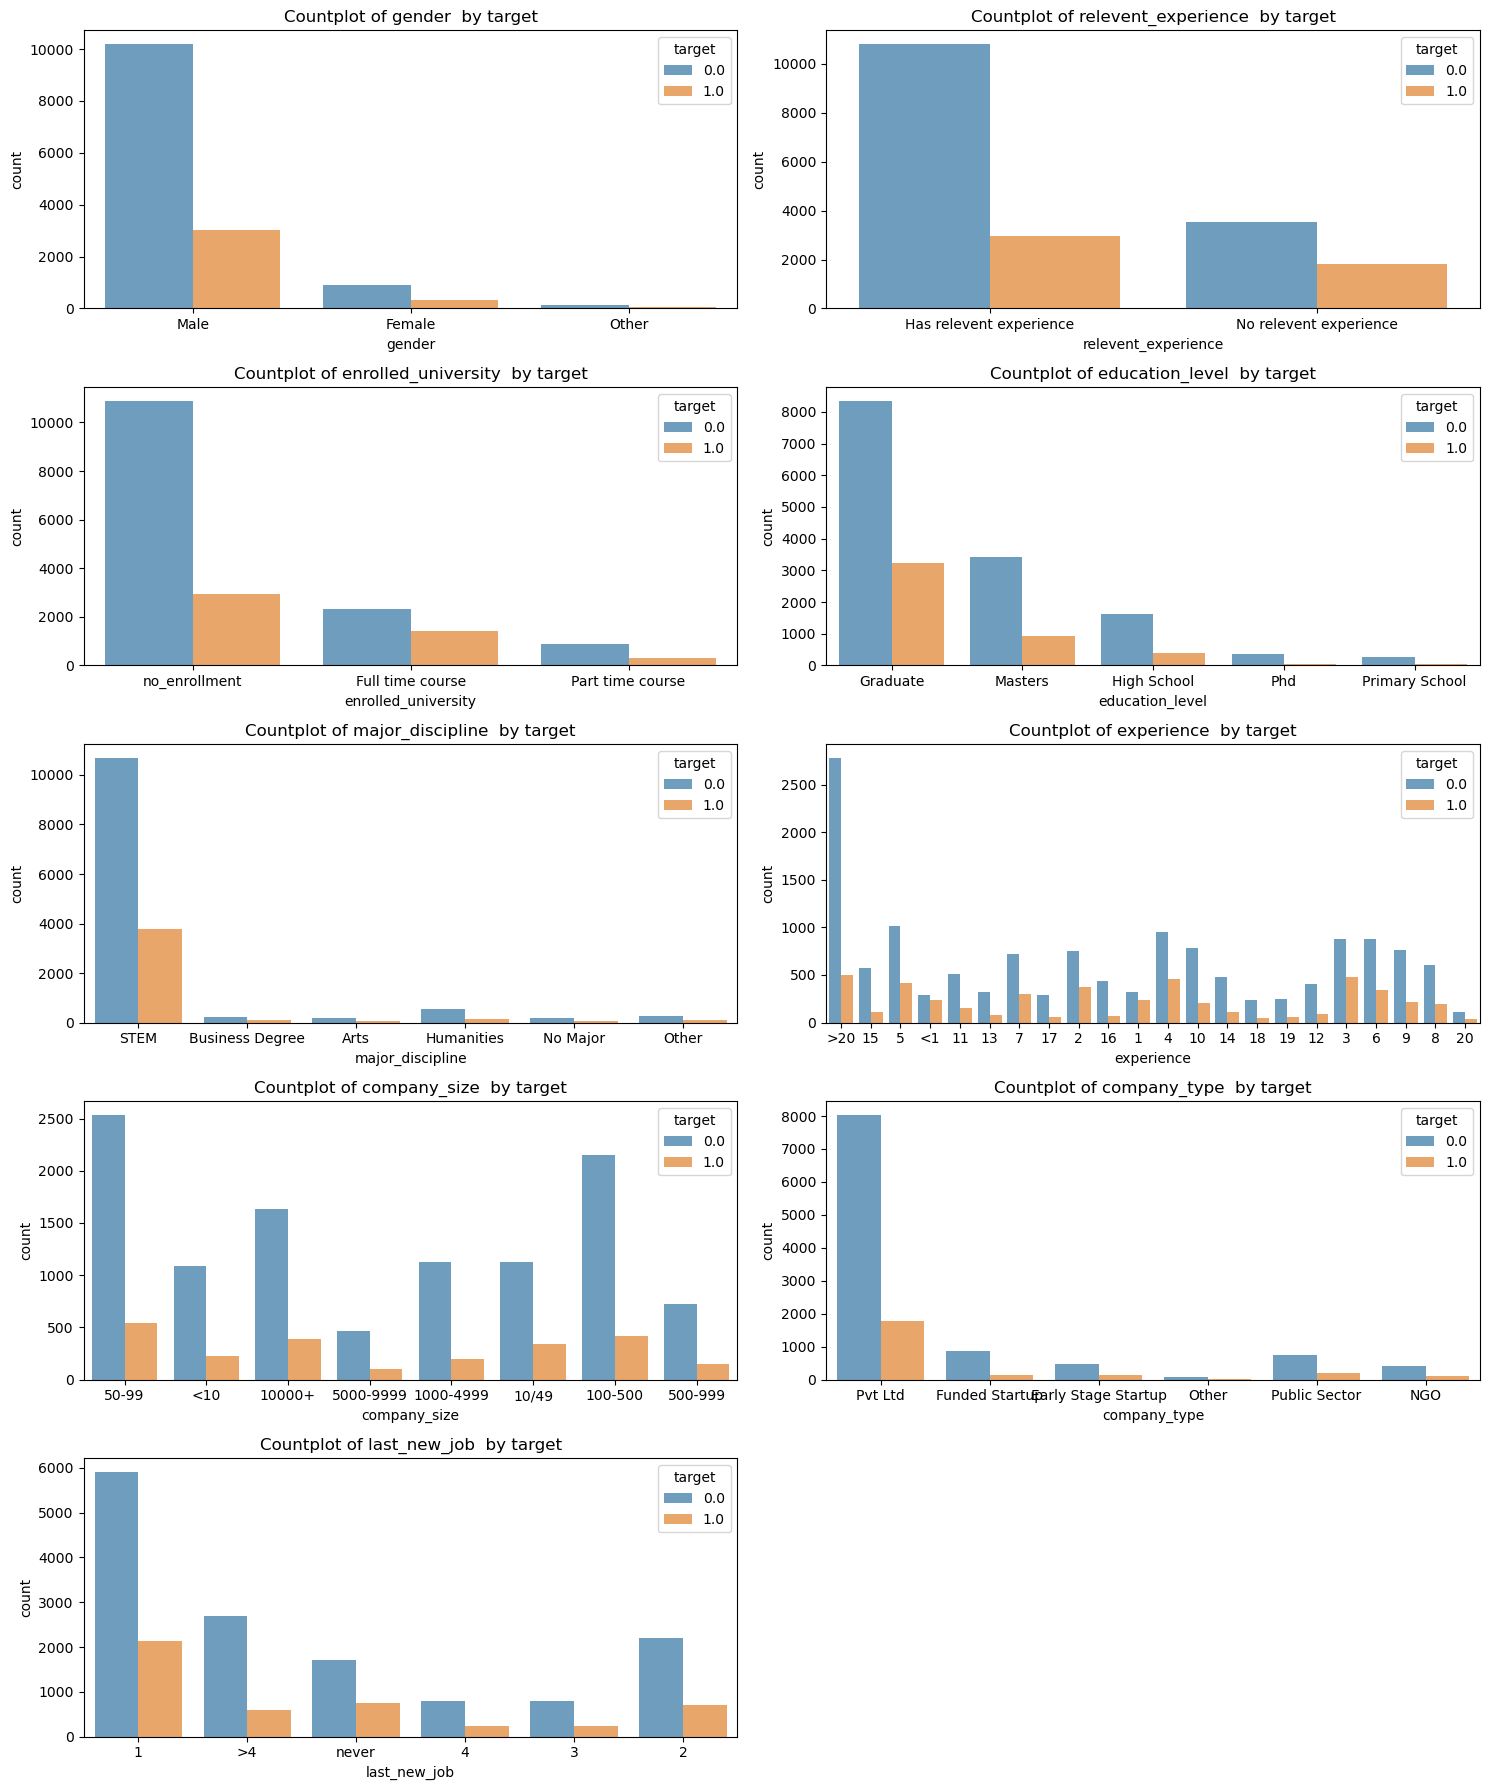

In [11]:
# Visualization of categorical variables and Frequency of each label
plt.figure(figsize=[15,18])
feafures = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in feafures:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [12]:
#From above histogram charts, it can be seen, there is no special correlation between the variables with the target function to 
#distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these 
#variables and the target function.

#Step 6- To check for Balance/Imbalance in dataset

In [13]:
#To check for data balance/imbalance
# Below code is providing a summary of the distribution of the target variable in terms of counts and percentages for the 
#two unique values (0 and 1). It helps us understand the balance or imbalance in the given binary classification dataset.

In [14]:
counts = data.target.value_counts() #this line counts the occurrences of each unique value in the 'target' column of the dataset. Results will tell the 'target' column is binary (probably indicating a binary classification problem), with values 0 and 1.
not_change = counts[0] #Assigns the count of occurrences of the value 0 in the 'target' column to the variable not_change
change = counts[1] #Assigns the count of occurrences of the value 1 in the 'target' column to the variable change
perc_not_change = (not_change/(not_change+change))*100 #Calculates the percentage of occurrences where the target variable is 0.
perc_change = (change/(not_change+change))*100 #Calculates the percentage of occurrences where the target variable is 1.
print('There were {} nonot_change ({:.3f}%) and {} change ({:.3f}%).'.format(not_change, perc_not_change, change, perc_change)) #Prints a formatted string displaying the counts and percentages of 'not_change' (target variable equal to 0) and 'change' (target variable equal to 1)

There were 14381 nonot_change (75.065%) and 4777 change (24.935%).


In [15]:
#To select the column names from the dataset where the data type is not an object
np.array(data.columns[data.dtypes != object])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

In [16]:
#Above resulting array ['enrollee_id', 'city_development_index', 'training_hours', 'target'] consists of the column names 
#from the dataset that have non-object data types. The types of columns included in this array are:

#'enrollee_id': This is a unique identifier for each record.

#'city_development_index': This is a numerical column, representing an index or score related to the development level of a city.

#'training_hours': This is a numerical column representing the number of training hours.

#'target': This column is part of the initial analysis and likely represents the target variable for a classification problem 
#(0 or 1).

#The array thus includes columns that are relevant for numerical analysis or modeling tasks, excluding columns with object data 
#types (typically representing categorical or text data).

In [17]:
#To make a copy of the original datasets (data and test), then converting the non-object columns in both training and test sets 
#to string type, and finally dropping the original non-object columns from the training and test sets.
#Thus, we are preparing the datasets for further processing,for a machine learning task where the input features need to be 
#in a specific format.

import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [18]:
#To inspect the columns of the modified training dataset (df_train). 
#This can be useful for verifying that the changes we applied to the dataset have been carried out as expected or 
#to understand the current structure of the dataset.

df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

#Step 7- Converting Categorical features into Numerical Features

In [19]:
#To encode categorical variables with numerical labels
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# To build dictionary function
cols = np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# Only for categorical columns, applying dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))

# Restoring the original categorical columns in df_train and df_test
df_train[cols] = data[cols]
df_test[np.delete(cols, len(cols) - 1)] = test[np.delete(cols, len(cols) - 1)]

In [20]:
#To get insights into the relationship between above features and the target.
# Display data types of each column in df_train
print(df_train.dtypes)

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Display the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with target variable:\n", correlation_with_target)

city                        int32
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int32
company_size                int32
company_type                int32
last_new_job                int32
enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
dtype: object
Correlation with target variable:
 target                    1.000000
company_size              0.186114
relevent_experience       0.128430
company_type              0.118226
gender                    0.067676
city                      0.056233
enrollee_id               0.049475
last_new_job             -0.001687
major_discipline         -0.005513
experience               -0.006335
training_hours           -0.021577
education_level          -0.075754
enrolled_university      -0.149475
city_development_ind

In [21]:
df_test.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours'],
      dtype='object')

#Step 8- Correlation Analysis between different features in the training dataset and test dataset

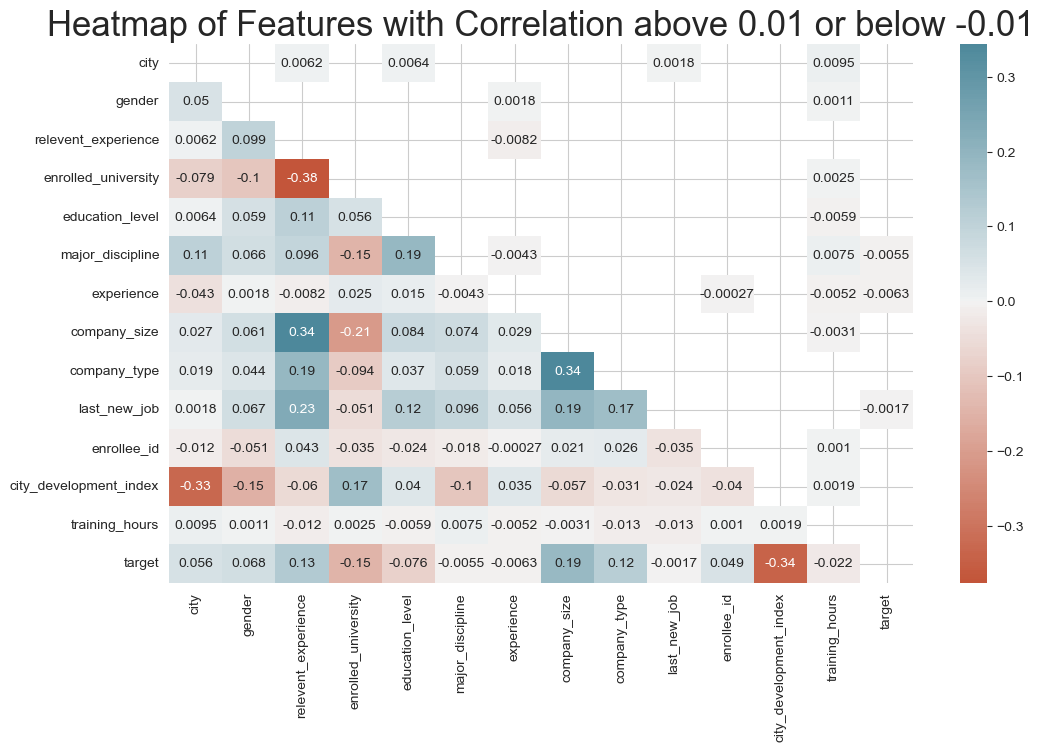

In [22]:
#The below heatmap provides a visual representation of the correlation between different features in the training dataset. 
#The color intensity and the annotated values give an indication of the strength and direction of the correlations.
#By choosing the correlation only if it’s above 0.01 or below -0.01 approach, we visualized a heatmap with only the correlations 
#that exceed the chosen threshold, making it easier to focus on the more influential relationships in the dataset.
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Set the plotting style
style.use('ggplot')
sns.set_style('whitegrid')

# Set the figure size
plt.subplots(figsize=(12, 7))

# Generate a mask for the upper triangle
mask = np.zeros_like(df_train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Specify the correlation threshold (e.g., 0.01)
correlation_threshold = 0.01

# Filter correlations based on the threshold
high_corr = df_train.corr().abs() > correlation_threshold
mask &= high_corr

# Plotting the heatmap
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center=0)

# Set the title
plt.title(f"Heatmap of Features with Correlation above {correlation_threshold} or below -{correlation_threshold}", fontsize=25)

# Show the plot
plt.show()


In [23]:
#From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means 
#candidates from city with higher amount of development index tends to change their job profile.


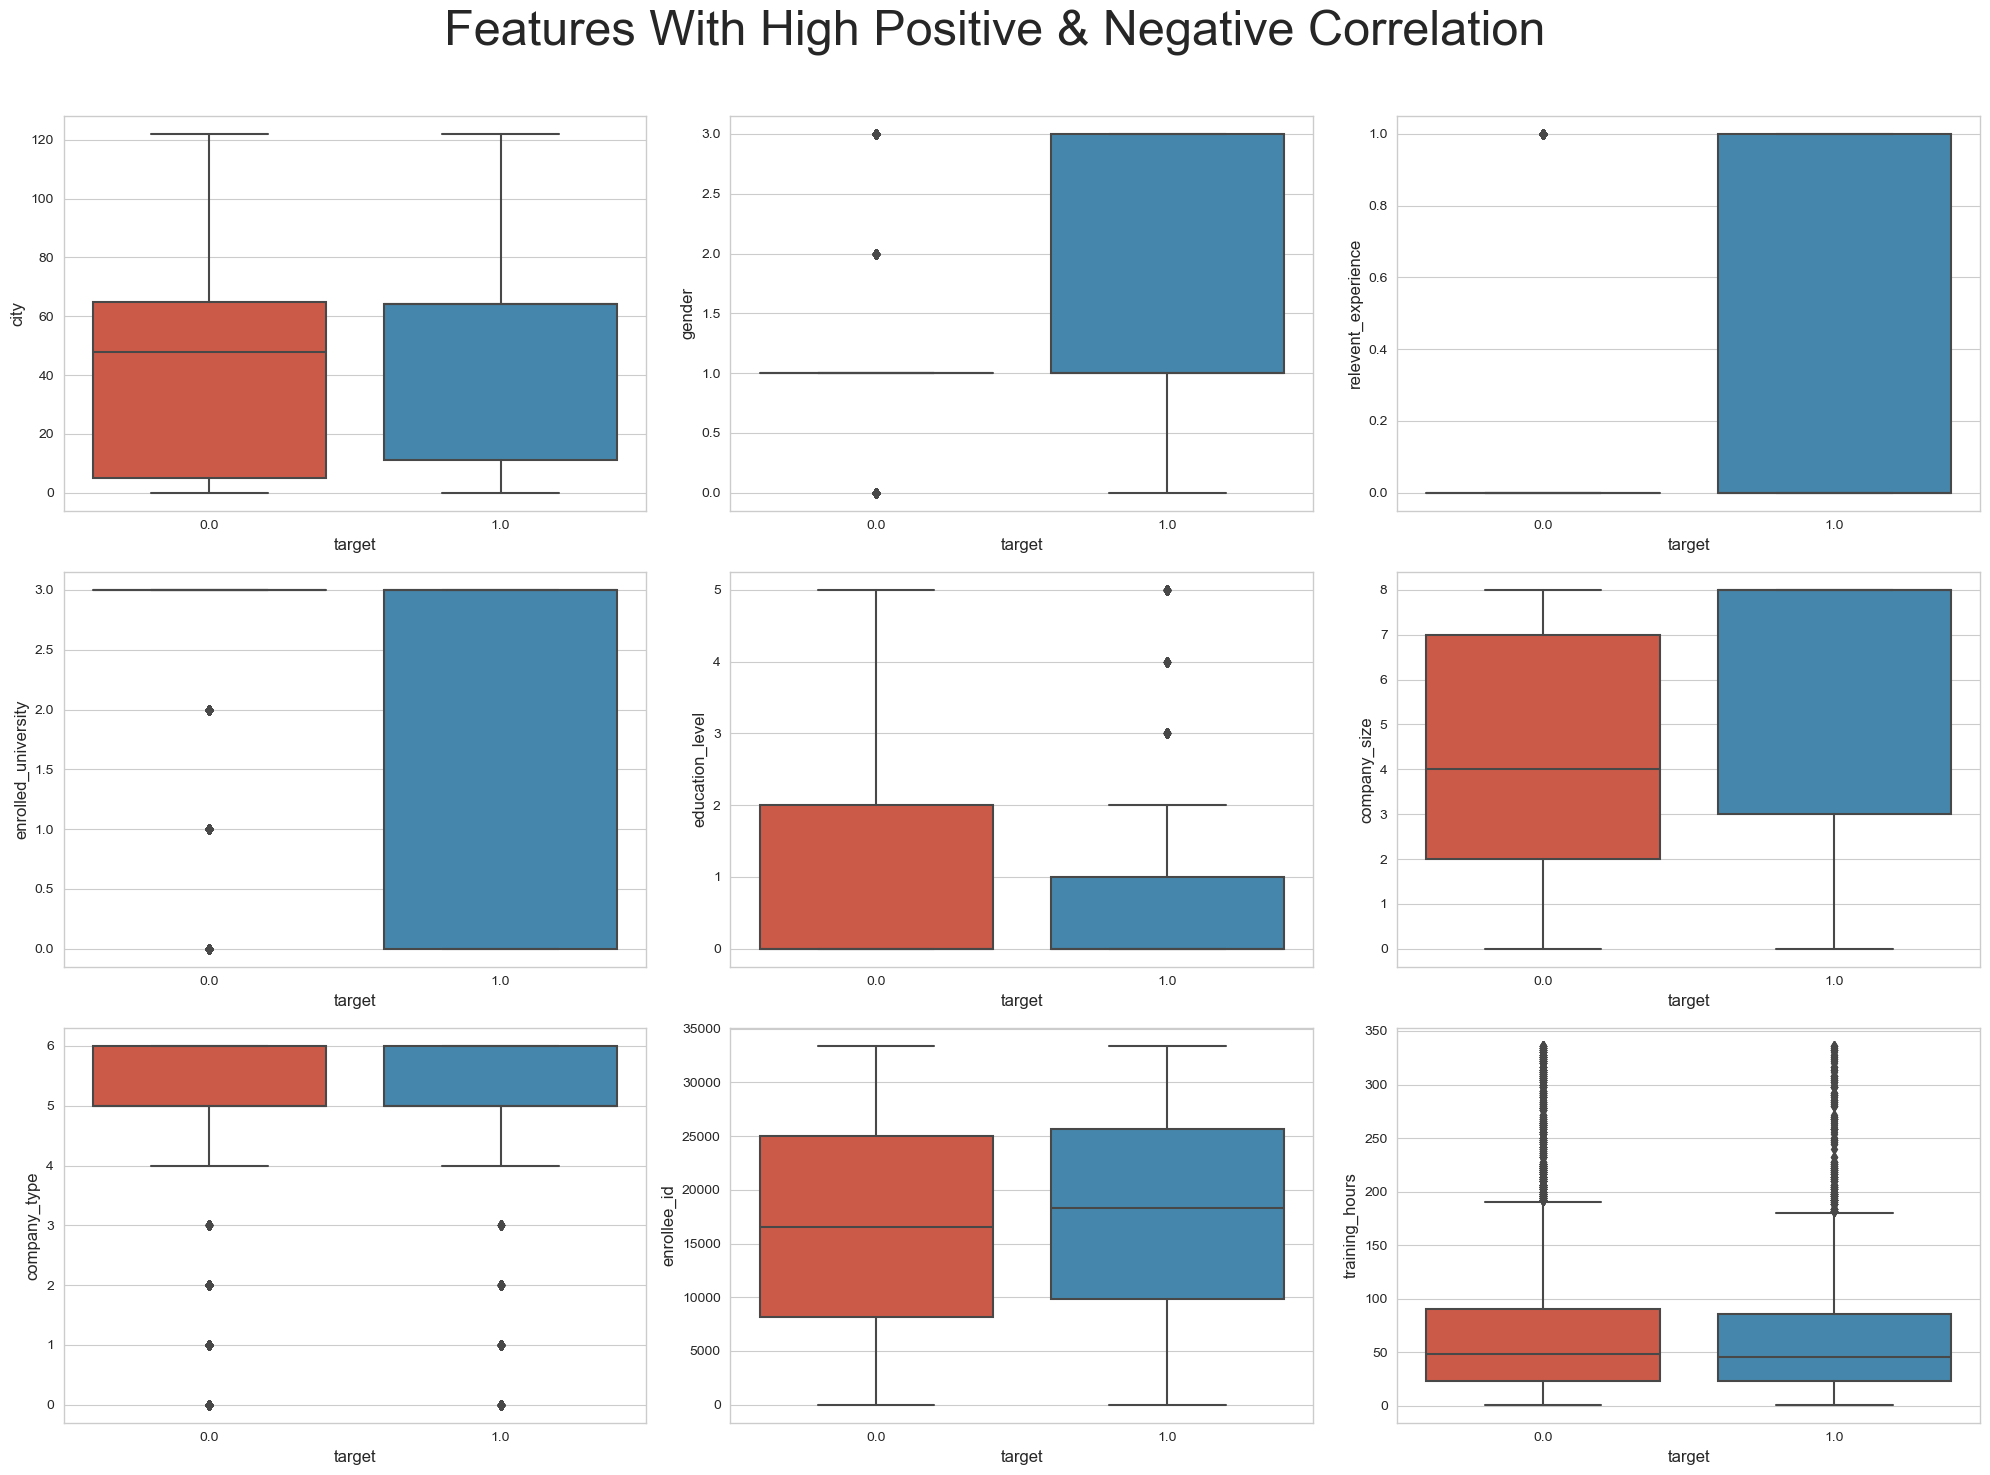

In [24]:
#To visualize the features with high positive and negative correlation with the target variable using a series of boxplots.
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots grid
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Set the overall title
f.suptitle('Features With High Positive & Negative Correlation', size=35)

# Plot boxplots for selected features
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0, 0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0, 1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0, 2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1, 0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1, 1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1, 2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2, 0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2, 1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

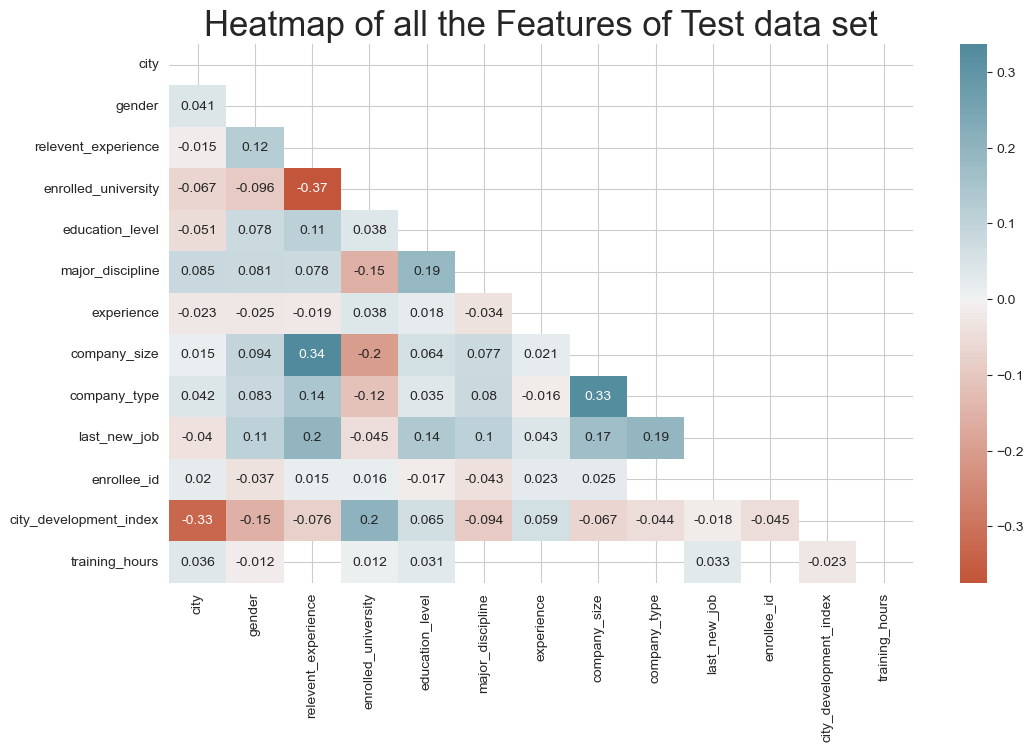

In [25]:
#To visualize the heatmap/correlation matrix of features in the test dataset (df_test)
#Correlation threshold=0.01, and the heatmap is generated only for the correlations that exceed this threshold. 
#This allows us to focus on the stronger correlations and their patterns in the test dataset.
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Set the plotting style
style.use('ggplot')
sns.set_style('whitegrid')

# Set the figure size
plt.subplots(figsize=(12, 7))

# Generate a mask for the upper triangle
mask = np.zeros_like(df_test.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Calculate the correlation matrix
corr = df_test.corr()

# Plotting the heatmap
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center=0)

# Set the title
plt.title("Heatmap of all the Features of Test data set", fontsize=25)

# Show the plot
plt.show()


In [26]:
#Thus, the correlation between the variables in the Training Dataset and Test dataset is nearly the same
#So, good predictive results could be expected if a good training result is obtained.

In [27]:
#To count the occurrences of each unique value in the 'target' column of the DataFrame df_train
df_train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [28]:
#'0' occurs 143981 times, and '1' occurs 4777 times in the 'target' column of the training dataset.
#From above result, we can clearly see that the target 0 is in majority which will effect our model. So, we will use 
#SMOTE (Synthetic Minority Over-sampling Technique) which will help us to create more synthetic data for the minority class 1.

#Step 9- Dealing with Imbalanced Data using  various smapling techniques: SMOTE (Synthetic Minority Over-sampling Technique), Borderline SMOTE, Borderline SMOTE SVM, and Adaptive Oversampling Techniques.

In [29]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours', 'target'],
      dtype='object')

In [30]:
ftrain = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'company_size', 'company_type', 'city_development_index', 'training_hours', 'target']
ftest = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'company_size', 'company_type', 'city_development_index', 'training_hours']

def Definedata():
    # Select relevant columns from df_train
    data2 = df_train[ftrain]

    # Extract features (X) and target variable (y)
    X = data2.drop(columns=['target']).values
    y = data2['target'].values

    return X, y


In [31]:
#Function named Synthetic Minority Over-sampling Technique SMOTE For Imbalanced Data Classification applied to 
#balance the class distribution in an imbalanced dataset. 

def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_resample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [32]:
#Function named Borderline SMOTE(Synthetic Minority Over-sampling Technique) For Imbalanced Data Classification applied to 
#balance the class distribution in an imbalanced dataset. 

def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [33]:
#Function named Borderline SMOTE SVM (Synthetic Minority Over-sampling Technique) For Imbalanced Data Classification applied to 
#balance the class distribution in an imbalanced dataset. 

def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    # Get the feature matrix (X) and target variable (y) using Definedata function
    X, y = Definedata()

    # Print the class distribution before applying SVMSMOTE
    counter_before = Counter(y)
    print("Class distribution before SVMSMOTE:", counter_before)
    
    # Apply SVMSMOTE to the dataset
    X_resampled, y_resampled = SVMSMOTE().fit_resample(X, y)
    
    # Split the resampled dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=2)

    # Print the class distribution after applying SVMSMOTE
    counter_after = Counter(y_resampled)
    print("Class distribution after SVMSMOTE:", counter_after)
    
    # Scatter plot of examples by class label
    for label, _ in counter_after.items():
        row_ix = where(y_resampled == label)[0]
        pyplot.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))
    
    # Show the legend and plot
    pyplot.legend()
    pyplot.show()
    
    # Return the resampled training and testing sets
    return X_train, X_test, y_train, y_test


In [34]:
#Function named Adaptive Synthetic Over-sampling Technique ADASYN For Imbalanced Data Classification applied to 
#balance the class distribution in an imbalanced dataset. 

def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

# Predictive Analytics/ Modelling

#Further parts of code are run to train a machine learning model and evaluate its performance using different metrics such as accuracy.

In [35]:
!pip install xgboost

In [36]:
!pip install lightgbm

In [37]:
!pip install --upgrade scikit-learn

In [37]:
!pip install matplotlib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [38]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix

import seaborn 
import matplotlib.pyplot as plt
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career swith = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
    g2.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
    g3.set_ylabel('Total career swith = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

def Featureimportances(models):
    model = models
    model.fit(X_train1,y_train1)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

In [39]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


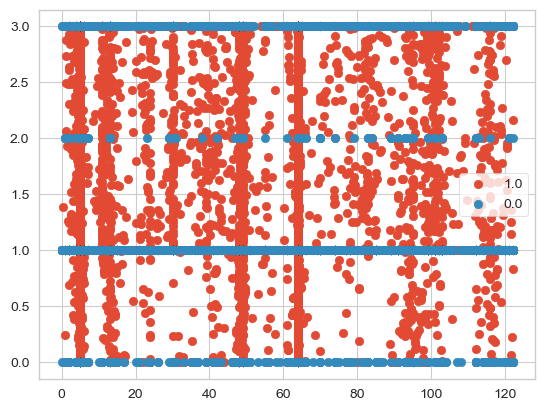

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


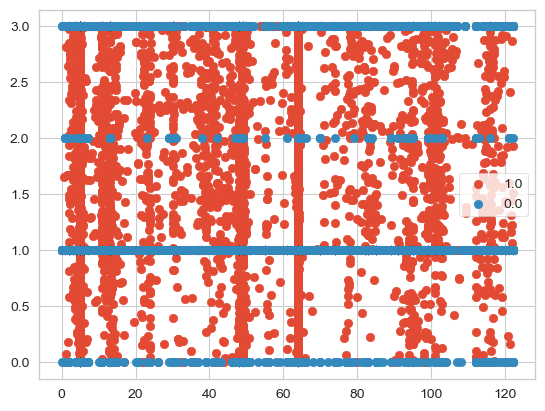

Class distribution before SVMSMOTE: Counter({0.0: 14381, 1.0: 4777})
Class distribution after SVMSMOTE: Counter({1.0: 14381, 0.0: 14381})


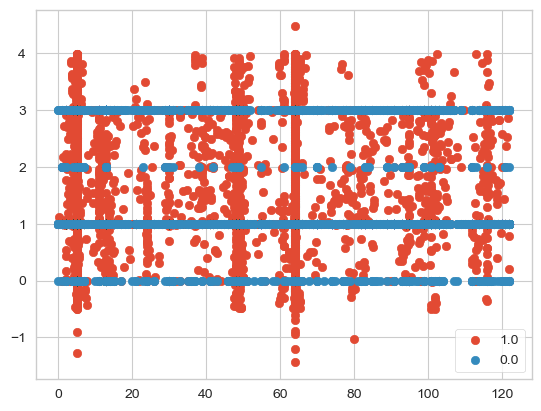

Counter({0.0: 14381, 1.0: 4777})
Counter({0.0: 14381, 1.0: 14232})


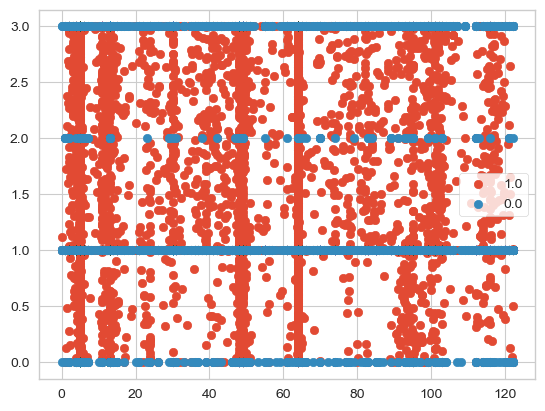

In [40]:
# Using different oversampling techniques to balance your datasetX_train1, X_test1, y_train1, y_test1 
X_train1, X_test1, y_train1, y_test1 = SMOTE()
X_train2, X_test2, y_train2, y_test2 = BSMOTE()
X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
X_train4, X_test4, y_train4, y_test4 = ADASYN()

# I) Logistic Regression

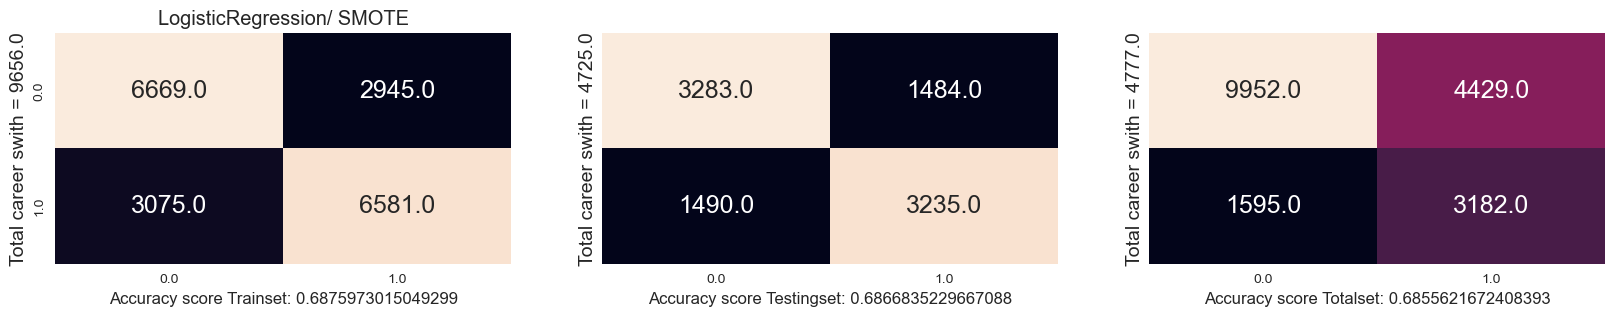

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [41]:
title = "LogisticRegression/ SMOTE" 
Models(LogisticRegression(),X_train1, X_test1, y_train1, y_test1, title)

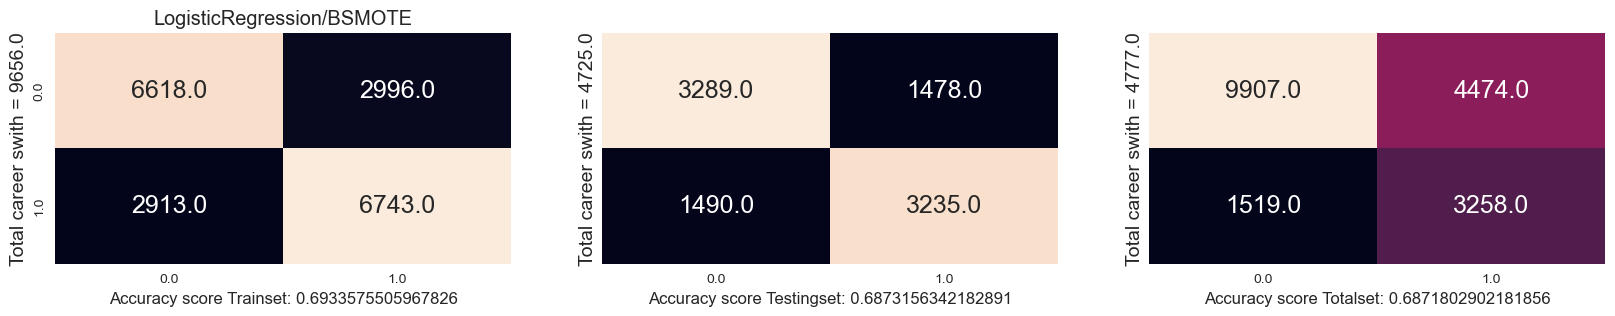

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [42]:
title = "LogisticRegression/BSMOTE"
Models(LogisticRegression(),X_train2, X_test2, y_train2, y_test2, title)

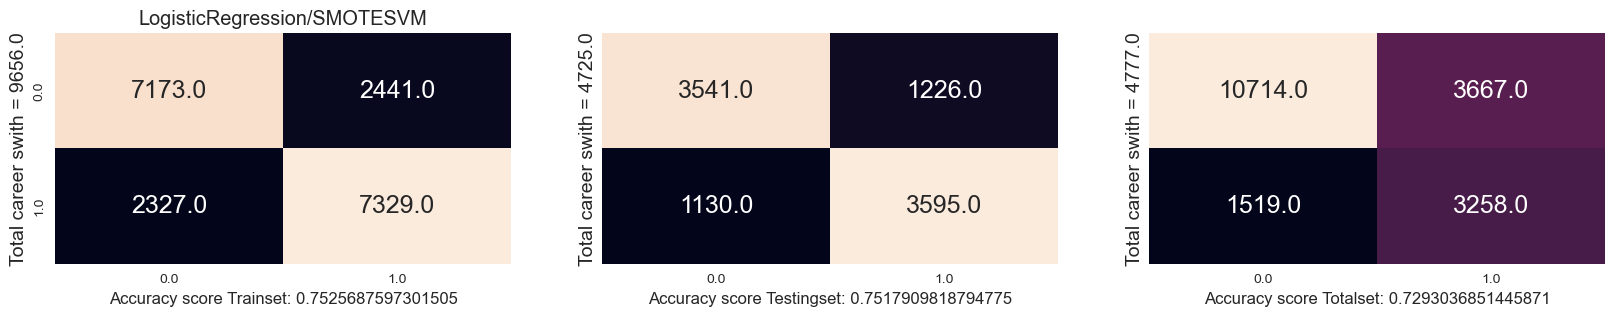

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]))

In [43]:
title = "LogisticRegression/SMOTESVM"
Models(LogisticRegression(),X_train3, X_test3, y_train3, y_test3, title)

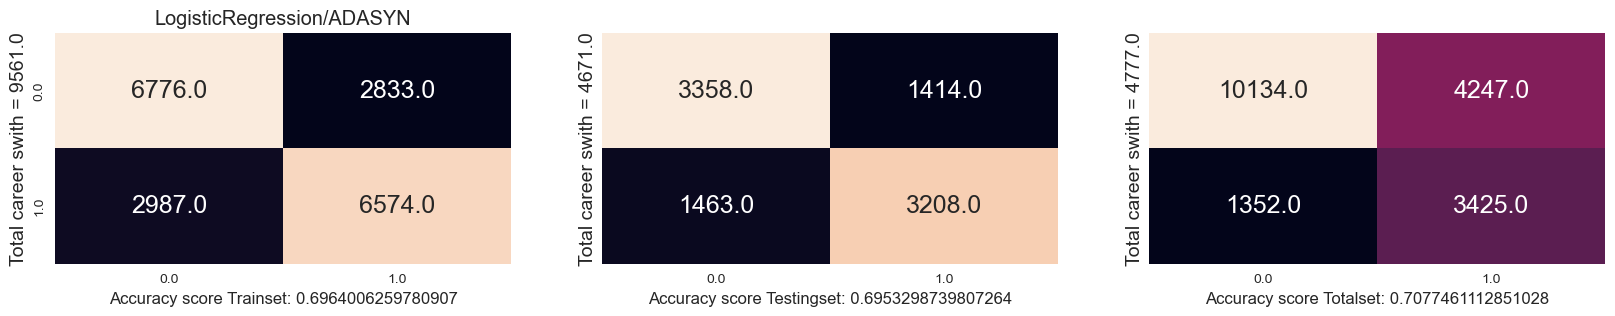

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [44]:
title = "LogisticRegression/ADASYN"
Models(LogisticRegression(),X_train4, X_test4, y_train4, y_test4, title)

# II) Naive Bayes - Gaussian Naive Bayes¶

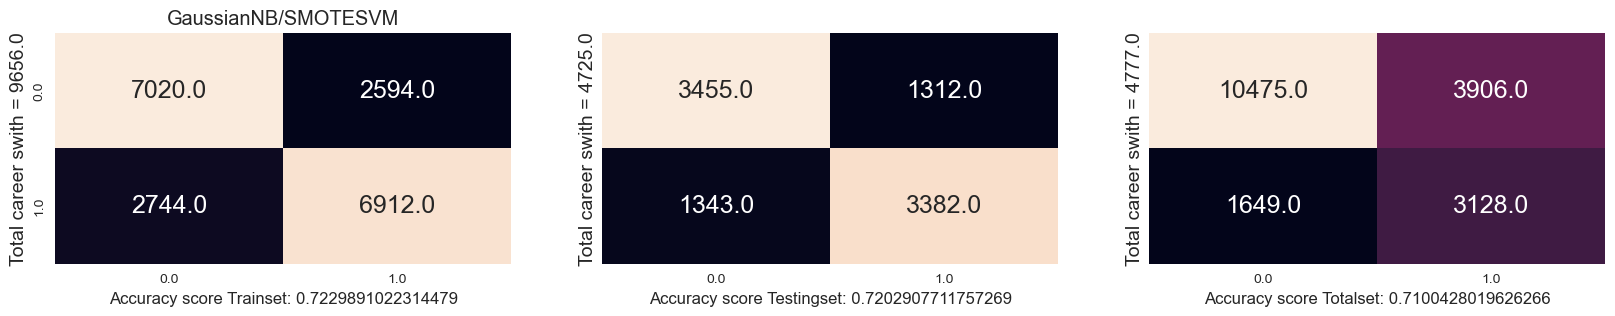

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]))

In [45]:
title = "GaussianNB/SMOTESVM"
Models(GaussianNB(),X_train3, X_test3, y_train3, y_test3, title)

# III) K- Nearest Neighbour Classifier

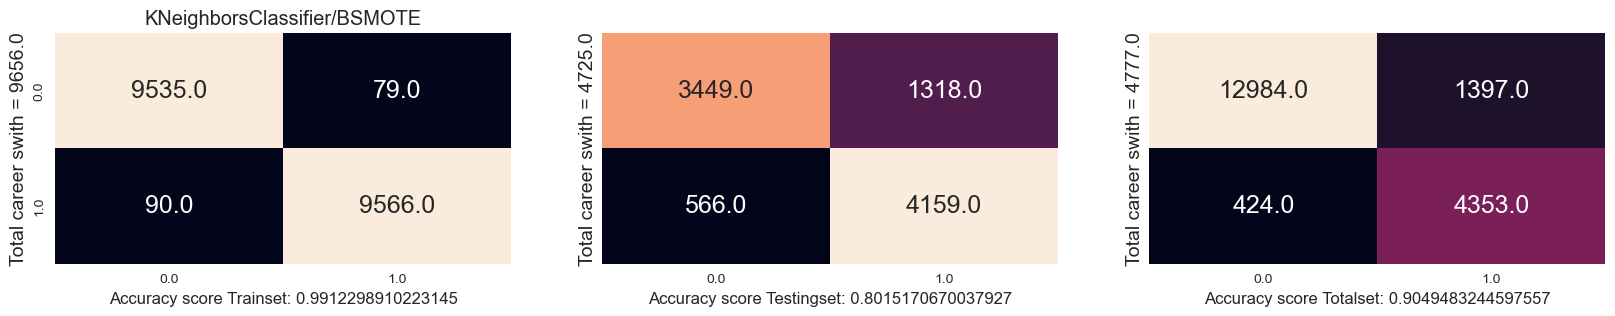

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]))

In [46]:
title = "KNeighborsClassifier/BSMOTE"
Models(KNeighborsClassifier(n_neighbors=1),X_train2, X_test2, y_train2, y_test2, title)

# IV) Decision Tree Classifier

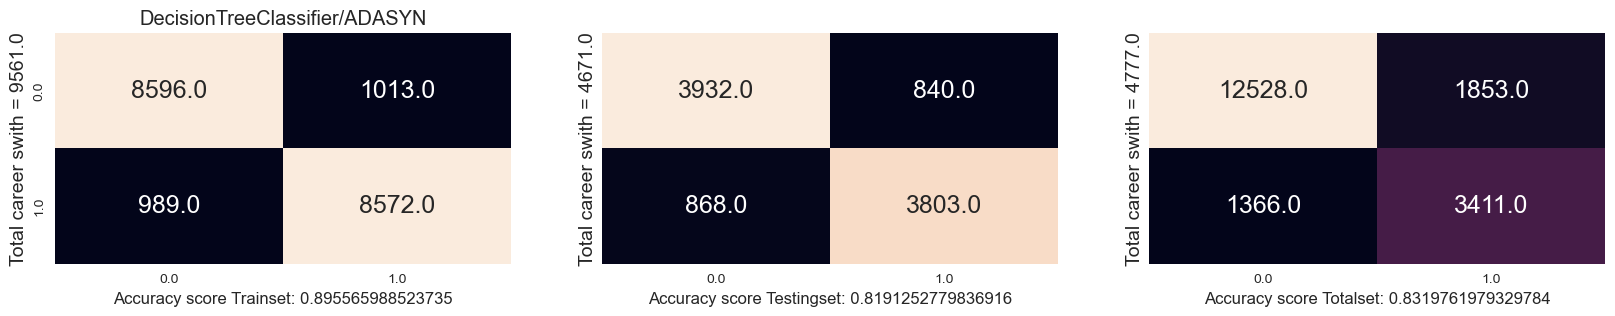

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [47]:
title = "DecisionTreeClassifier/ADASYN"
Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title)

In [48]:
Featureimportances(DecisionTreeClassifier(max_depth=14))

,Features,Importance,Sum Importance
3,enrolled_university,0.024459,0.193980
1,gender,0.031415,0.070988
0,city,0.039573,0.039573
5,company_size,0.074786,0.408760
2,relevent_experience,0.098534,0.169522
8,training_hours,0.100081,1.000000
4,education_level,0.139994,0.333974
6,company_type,0.245065,0.653825
7,city_development_index,0.246094,0.899919


# V) Random Forest Classifier

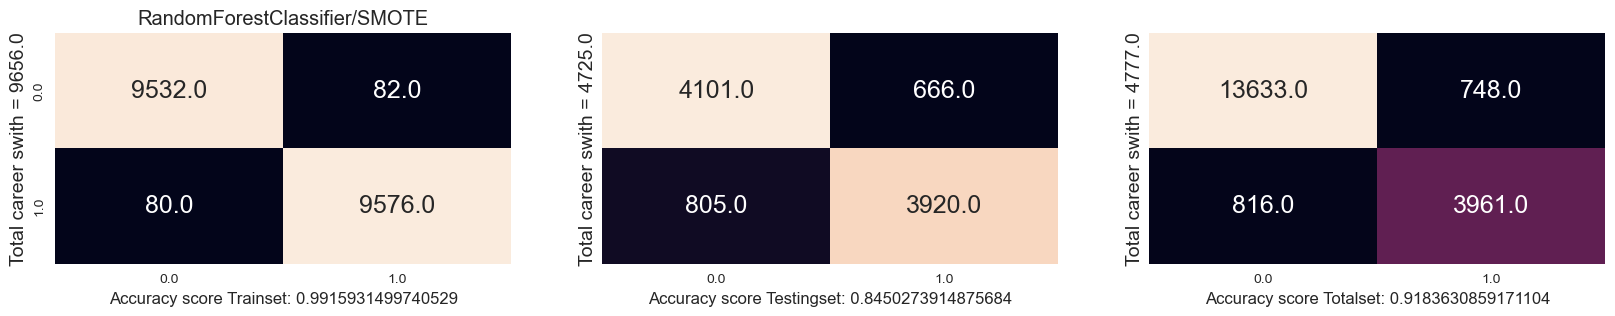

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [52]:
title = "RandomForestClassifier/SMOTE"
Models(RandomForestClassifier(n_estimators=500,max_depth=200,max_features=7),X_train1, X_test1, y_train1, y_test1, title)

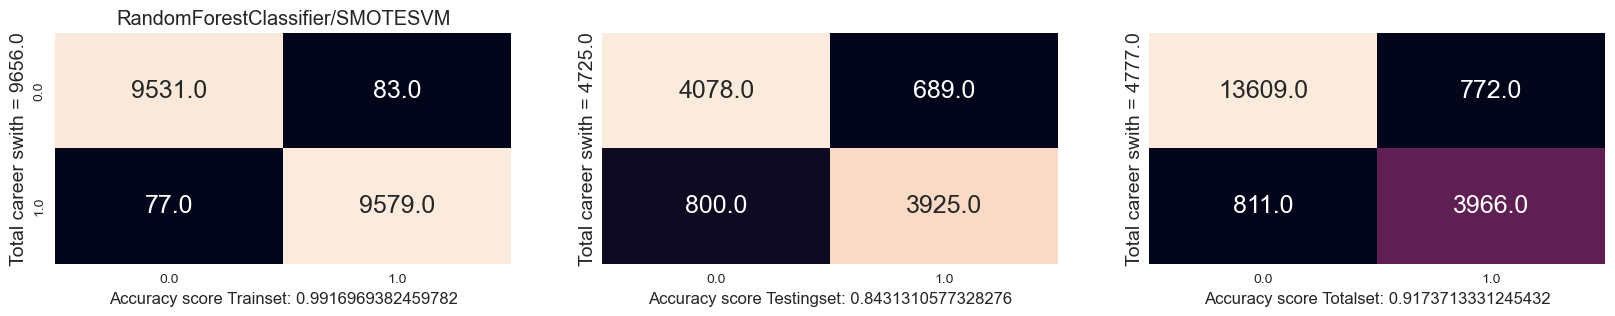

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [53]:
title = "RandomForestClassifier/SMOTESVM"
Models(RandomForestClassifier(),X_train3, X_test3, y_train3, y_test3, title)

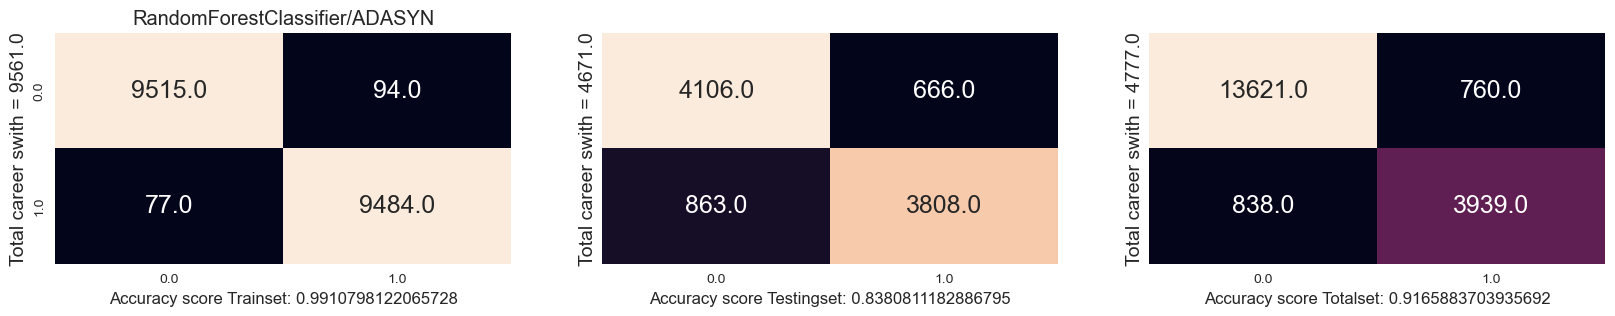

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]))

In [54]:
title = "RandomForestClassifier/ADASYN"
Models(RandomForestClassifier(),X_train4, X_test4, y_train4, y_test4, title)

In [55]:
Featureimportances(RandomForestClassifier())

,Features,Importance,Sum Importance
1,gender,0.052699,0.146753
3,enrolled_university,0.055332,0.272229
2,relevent_experience,0.070144,0.216897
4,education_level,0.090376,0.362606
0,city,0.094054,0.094054
6,company_type,0.104556,0.576901
5,company_size,0.109739,0.472345
7,city_development_index,0.194584,0.771485
8,training_hours,0.228515,1.000000


# VI) XGBoost Classifier

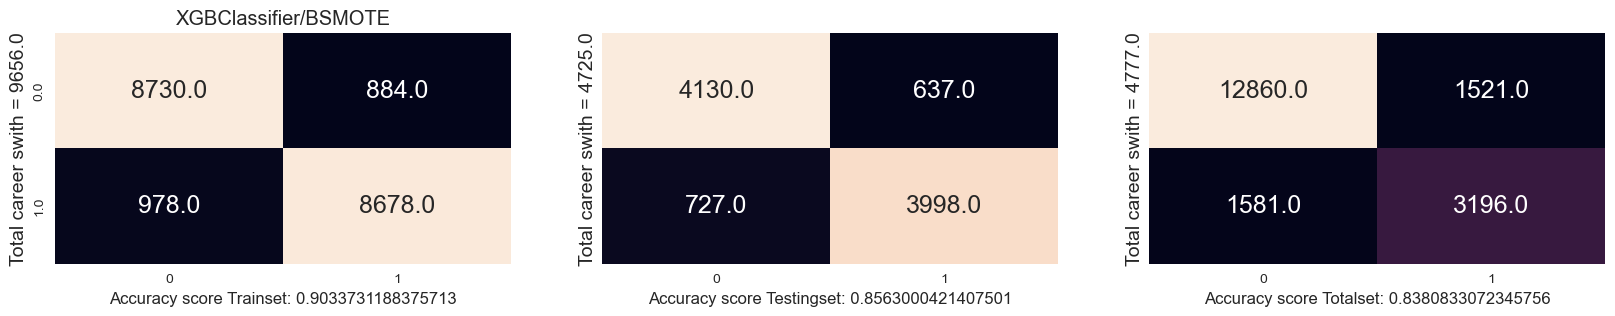

(array([1., 0., 0., ..., 0., 0., 0.]), array([1, 0, 1, ..., 0, 0, 0]))

In [56]:
title = "XGBClassifier/BSMOTE"
Models(XGBClassifier(),X_train2, X_test2, y_train2, y_test2, title)

In [57]:
Featureimportances(XGBClassifier())

,Features,Importance,Sum Importance
8,training_hours,0.019558,1.000000
0,city,0.030770,0.030770
1,gender,0.083647,0.114418
3,enrolled_university,0.089518,0.429079
5,company_size,0.091989,0.653771
4,education_level,0.132703,0.561782
7,city_development_index,0.147922,0.980442
6,company_type,0.178749,0.832520
2,relevent_experience,0.225143,0.339561


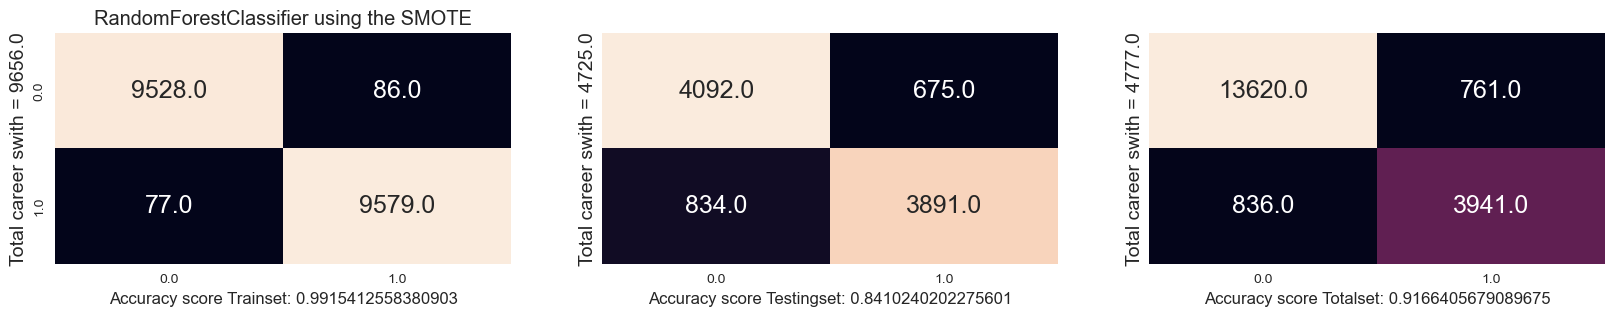

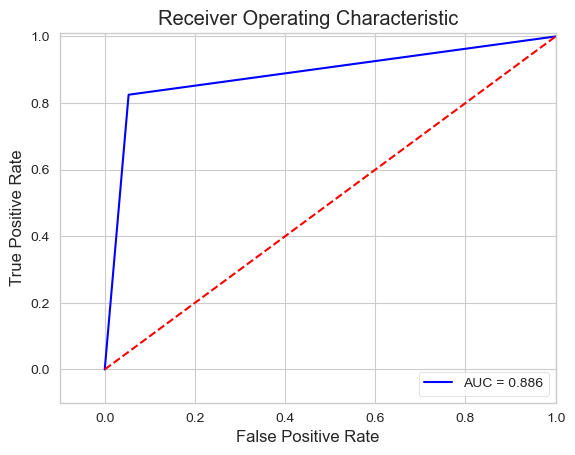

In [58]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

title = 'RandomForestClassifier using the SMOTE'
y, ypred =  Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

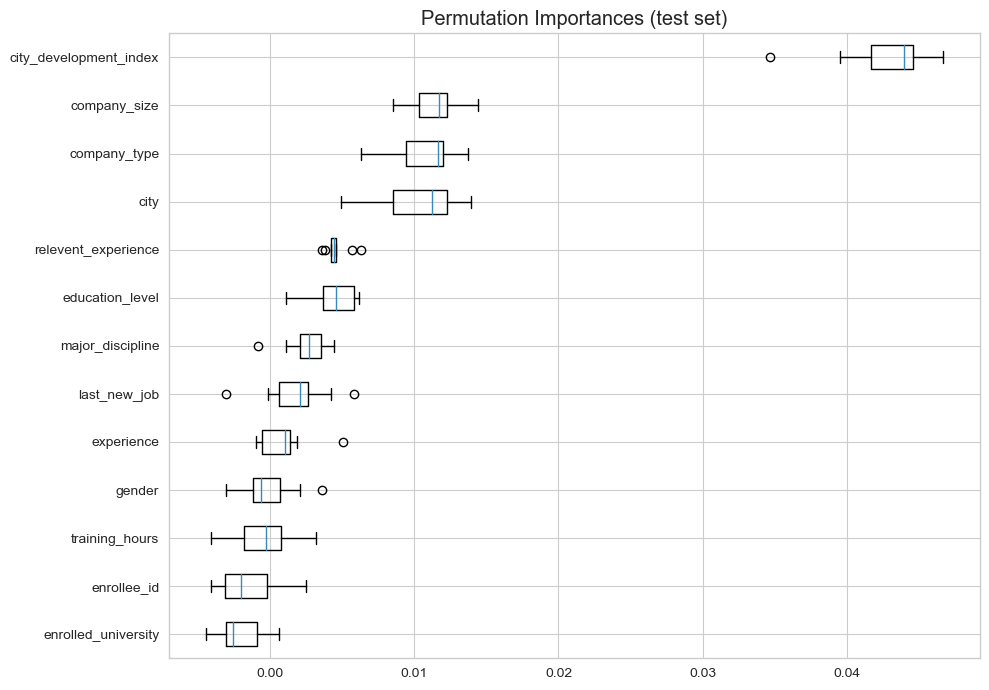

In [59]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix,auc,roc_curve
from sklearn.model_selection import train_test_split

X=df_train.drop(columns=['target'])
y=df_train['target'].values
model = RandomForestClassifier()
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
model.fit(X_train,y_train)    
resultmymodel = permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = resultmymodel.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(resultmymodel.importances[sorted_idx].T,vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

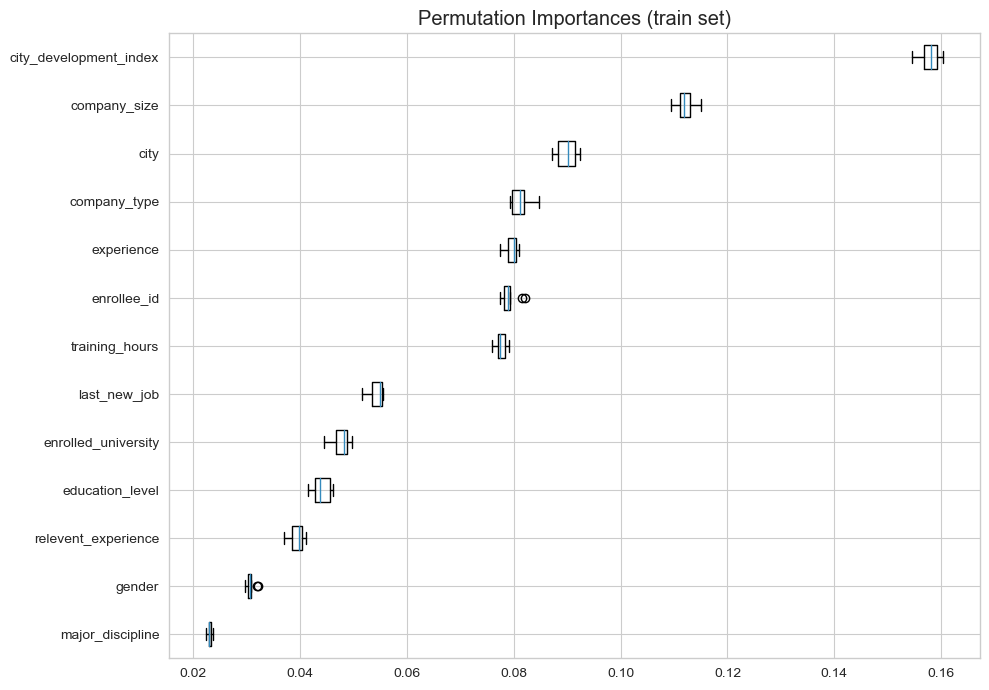

In [60]:
resultmymodel = permutation_importance(model, X_train, y_train, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = resultmymodel.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(resultmymodel.importances[sorted_idx].T,vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

Class distribution before SVMSMOTE: Counter({0.0: 14381, 1.0: 4777})
Class distribution after SVMSMOTE: Counter({1.0: 14381, 0.0: 14381})


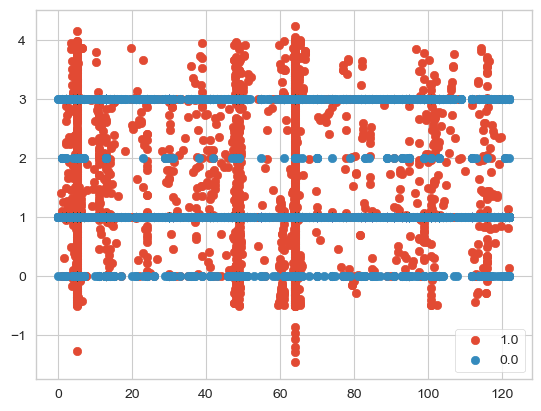

0.0    1654
1.0     475
Name: target, dtype: int64


In [61]:
ftest0 = ['enrollee_id','city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours']
test = df_test[ftest0].copy()
df_test = df_test[ftest].copy()

X_train, X_test, y_train, y_test = SMOTESVM()

model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions=model.predict(df_test[ftest].values)
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
submission['enrollee_id']=test['enrollee_id']

submission['target']=model.predict(df_test.values)

print(submission.target.value_counts())

In [62]:
submission.head(20)

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,1.0
3,27385,0.0
4,27724,0.0
5,217,0.0
6,21465,1.0
7,27302,1.0
8,12994,0.0
9,16287,1.0


In [63]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
